In [1]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'RFMiD_Training_Labels.csv'
dataset = pd.read_csv(file_path)

# Group by 'Disease_Risk' to calculate class centroids and spreads
grouped = dataset.groupby('Disease_Risk')

# Calculate the centroids (means) and spreads (standard deviations) for each class
centroids = grouped.mean(numeric_only=True)
spreads = grouped.std(numeric_only=True)

# Function to calculate the Euclidean distance between centroids of two classes
def calculate_distance(class1, class2, centroids):
    centroid1 = centroids.loc[class1].values
    centroid2 = centroids.loc[class2].values
    distance = np.linalg.norm(centroid1 - centroid2)
    return distance

# Example: Calculate the distance between centroids of class 2 and class 1
distance_2_1 = calculate_distance(1,0, centroids)

# Print centroids, spreads, and the distance between centroids of class 2 and class 1
print("Centroids:\n", centroids)
print("\nSpreads:\n", spreads)
print(f"\nDistance between centroids of class 2 and class 1: {distance_2_1}")


Centroids:
                        ID        DR      ARMD       MH        DN       MYA  \
Disease_Risk                                                                 
0             1188.334165  0.000000  0.000000  0.00000  0.000000  0.000000   
1              900.354180  0.247531  0.065833  0.20869  0.090849  0.066491   

                  BRVO      TSLN       ERM        LS  ...       CME      PTCR  \
Disease_Risk                                          ...                       
0             0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
1             0.048058  0.122449  0.009217  0.030941  ...  0.002633  0.003292   

                    CF        VH       MCA        VS      BRAO       PLQ  \
Disease_Risk                                                               
0             0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1             0.001975  0.000658  0.000658  0.000658  0.001317  0.000658   

                  HPED        CL  
Disease_Ri

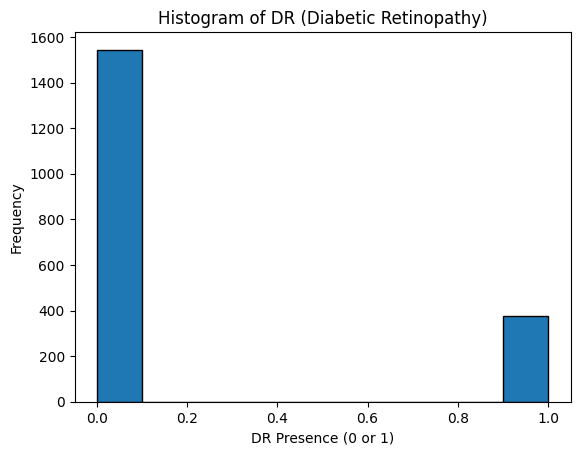

Mean: 0.19583333333333333
Variance: 0.15748263888888892


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the RFMiD dataset
file_path = 'RFMiD_Training_Labels.csv'  # Replace with the actual path to your RFMiD CSV file
dataset = pd.read_csv(file_path)

# Select a feature from the RFMiD dataset
# Example: Assume 'DR' (Diabetic Retinopathy) as a feature for illustration. Replace it with your chosen feature.
feature = dataset['DR']  # Replace 'DR' with the actual feature column you want to use

# Handle NaN values by dropping them
feature_clean = feature.dropna()

# Calculate the histogram data
hist_data, bin_edges = np.histogram(feature_clean, bins=10)

# Plot the histogram
plt.hist(feature_clean, bins=10, edgecolor='black')
plt.title('Histogram of DR (Diabetic Retinopathy)')
plt.xlabel('DR Presence (0 or 1)')
plt.ylabel('Frequency')
plt.savefig('DR_Presence.jpg', dpi=300)  # Adjust filename and dpi as needed

plt.show()

# Calculate the mean and variance of the feature
mean_value = np.mean(feature_clean)
variance_value = np.var(feature_clean)

print(f"Mean: {mean_value}")
print(f"Variance: {variance_value}")


NaN values in DR: 0
NaN values in ARMD: 0
Infinite values in DR: 0
Infinite values in ARMD: 0


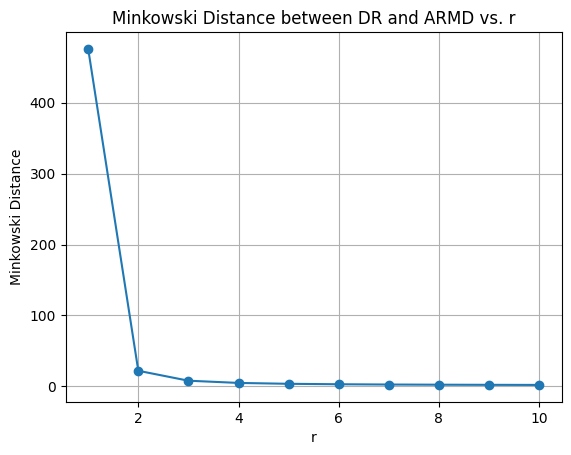

Minkowski distances for r from 1 to 10: [476.0, 21.817424229271428, 7.807925321779708, 4.670912569217222, 3.4317954219025806, 2.794266508724554, 2.412766414888757, 2.1612294115195687, 1.9838639407259124, 1.8525105726830766]


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import minkowski

# Load the RFMiD dataset
file_path = 'RFMiD_Training_Labels.csv'  # Replace with the actual path to your RFMiD dataset
dataset = pd.read_csv(file_path)

# Select two feature vectors, e.g., 'DR' (Diabetic Retinopathy) and 'ARMD' (Age-related Macular Degeneration)
# Replace these columns with the features you want to analyze
feature_1 = dataset['DR']   # e.g., 'DR'(Diabetic Retinopathy)
feature_2 = dataset['ARMD']  # e.g. 'ARMD'(Age-related Macular Degeneration)

# Check for NaN or infinite values
print("NaN values in DR:", feature_1.isna().sum())
print("NaN values in ARMD:", feature_2.isna().sum())
print("Infinite values in DR:", np.isinf(feature_1).sum())
print("Infinite values in ARMD:", np.isinf(feature_2).sum())

# Remove rows with NaN or infinite values
cleaned_dataset = dataset.dropna(subset=['DR', 'ARMD'])
cleaned_dataset = cleaned_dataset[~np.isinf(cleaned_dataset['DR']) & ~np.isinf(cleaned_dataset['ARMD'])]

# Extract cleaned feature vectors
feature_1 = cleaned_dataset['DR']
feature_2 = cleaned_dataset['ARMD']

# Calculate the Minkowski distance for r from 1 to 10
r_values = range(1, 11)
distances = [minkowski(feature_1, feature_2, p=r) for r in r_values]

# Plot the distances
plt.plot(r_values, distances, marker='o')
plt.title('Minkowski Distance between DR and ARMD vs. r')
plt.xlabel('r')
plt.ylabel('Minkowski Distance')
plt.savefig('Minkowski Distance DR and ARMD.jpg', dpi=300)  # Adjust filename and dpi as needed

plt.grid(True)
plt.show()

# Display the distances
print("Minkowski distances for r from 1 to 10:", distances)


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = 'RFMiD_Training_Labels.csv'  # Replace with your dataset path
df = pd.read_csv(file_path)

# Display the unique classes in the target variable
print("Unique classes in 'Disease_Risk':", df['Disease_Risk'].unique())

# Define the classes you want to filter
class_a = 1   # 1 - Present
class_b = 0 #  0 - Not Present 

# Filter the DataFrame for only these two classes
filtered_df = df[df['Disease_Risk'].isin([class_a, class_b])]

# Check if the filtered DataFrame is empty
if filtered_df.empty:
    raise ValueError(f"No samples found for classes: {class_a} and {class_b}")

# Define features (X) and target (y) from the filtered DataFrame
X = filtered_df.drop('Disease_Risk', axis=1)  # Features are all columns except the target
y = filtered_df['Disease_Risk']  # Target is the 'Disease_Risk' column

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verify the shapes of the resulting datasets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape:", y_test.shape)


Unique classes in 'Disease_Risk': [1 0]
Training set shape: (1344, 46)
Test set shape: (576, 46)
y_train shape: (1344,)
y_test shape: (576,)


In [5]:
# A5. Train a kNN classifier (k = 3) using the training set
# Create the kNN classifier with k=3
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


neigh = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
neigh.fit(X_train, y_train)

# Make predictions
y_pred = neigh.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.81


In [6]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# A6: Test the accuracy of the kNN classifier using the test set
accuracy = neigh.score(X_test, y_test)
print(f"Accuracy of kNN classifier: {accuracy:.2f}")

# Generate predictions for more detailed metrics
y_pred = neigh.predict(X_test)

# Generate a classification report
classification_report = classification_report(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)

# Print the accuracy report
print("=== Classification Report ===")
print(classification_report)
print("=== Confusion Matrix ===")
print(confusion_matrix)


Accuracy of kNN classifier: 0.81
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.55      0.35      0.43       119
           1       0.85      0.93      0.88       457

    accuracy                           0.81       576
   macro avg       0.70      0.64      0.66       576
weighted avg       0.79      0.81      0.79       576

=== Confusion Matrix ===
[[ 42  77]
 [ 34 423]]


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

# Load the dataset
file_path = 'RFMiD_Training_Labels.csv'  # Update with your dataset path
df = pd.read_csv(file_path)

# Define the classes you want to filter
class_a = 1   # 1 - Present
class_b = 0   # 0 - Not Present 

# Filter the DataFrame for only these two classes
filtered_df = df[df['Disease_Risk'].isin([class_a, class_b])]

# Define features (X) and target (y) from the filtered DataFrame
X = filtered_df.drop('Disease_Risk', axis=1)
y = filtered_df['Disease_Risk']

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the kNN classifier with k=3
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

# Use the predict() function to predict class labels for the test set
y_pred = neigh.predict(X_test)

# Print the predicted classes for the test set
print("Predicted classes for the test set:")
print(y_pred)

# Predict the class for a specific test vector
# Choose a specific index from the test set to test
test_index = 0  # Replace with the index of the test vector you want to classify

# Use .iloc to access the row by index without converting to a NumPy array
test_vect = X_test.iloc[test_index:test_index + 1]  # Keep it as a DataFrame

# Perform classification
test_prediction = neigh.predict(test_vect)
print(f'Predicted class for test vector at index {test_index}: {test_prediction[0]}')


Predicted classes for the test set:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1
 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1
 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1

Accuracy with k=1: 1.00
Accuracy with k=2: 0.99
Accuracy with k=3: 0.99
Accuracy with k=4: 0.99
Accuracy with k=5: 0.99
Accuracy with k=6: 0.99
Accuracy with k=7: 0.99
Accuracy with k=8: 0.99
Accuracy with k=9: 0.99
Accuracy with k=10: 0.99
Accuracy with k=11: 0.99


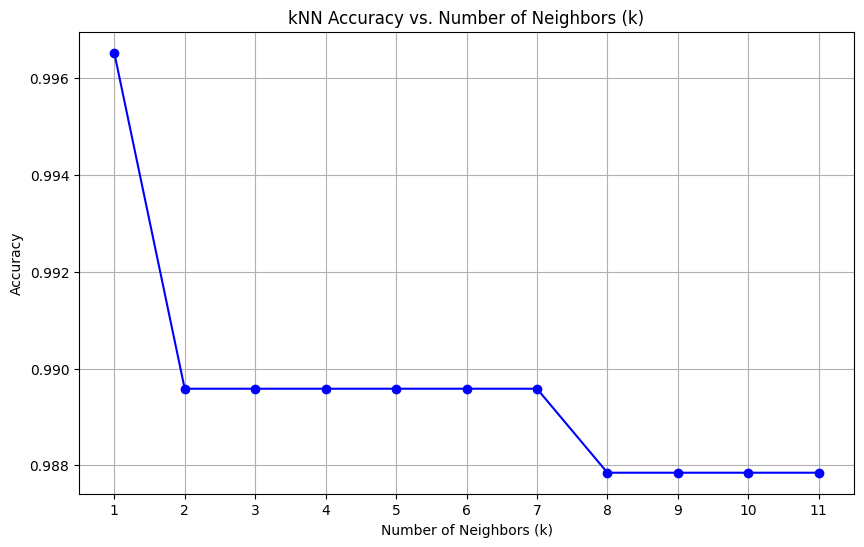


Comparison:
Accuracy with k=1: 1.00
Accuracy with k=3: 0.99


In [8]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = 'RFMiD_Training_Labels.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)

# Define the label column
label_column = 'Disease_Risk'  # Replace with the actual label column name in your dataset

# Separate features and labels
X = df.drop(columns=[label_column])  # Drop the label column to get features
y = df[label_column]  # The label column (target)

# Handle missing values in the target variable
y = y.dropna()  # Drop rows with missing target values

# Align X with y after dropping missing values
X = X.loc[y.index]

# Identify numeric columns (since the dataset is entirely numeric)
numeric_cols = X.columns.tolist()

# Create a preprocessing pipeline with imputation and scaling
preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values for numeric features
    ('scaler', StandardScaler())  # Scale numeric features
])

# Create a pipeline with preprocessing and kNN classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())  # Default k=5, we will modify this later
])

# Function to evaluate kNN classifier for different k values
def evaluate_knn(k):
    pipeline.set_params(classifier__n_neighbors=k)  # Set the number of neighbors
    pipeline.fit(X_train, y_train)  # Fit the model
    y_pred = pipeline.predict(X_test)  # Predict on the test set
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    return accuracy

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# List to store accuracy values for different k values
accuracy_list = []

# Evaluate kNN for k from 1 to 11
for k in range(1, 12):
    accuracy = evaluate_knn(k)
    accuracy_list.append(accuracy)
    print(f'Accuracy with k={k}: {accuracy:.2f}')

# Plot the accuracy for different k values
plt.figure(figsize=(10, 6))
plt.plot(range(1, 12), accuracy_list, marker='o', linestyle='-', color='b')
plt.title('kNN Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(range(1, 12))
plt.savefig('KNN_Accuracy.jpg', dpi=300)  # Adjust filename and dpi as needed

plt.grid(True)
plt.show()

# Compare k=1 and k=3
accuracy_k1 = evaluate_knn(1)
accuracy_k3 = evaluate_knn(3)

print(f'\nComparison:\nAccuracy with k=1: {accuracy_k1:.2f}')
print(f'Accuracy with k=3: {accuracy_k3:.2f}')


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# Load the dataset
file_path = 'RFMiD_Training_Labels.csv'  # Update with your dataset path
df = pd.read_csv(file_path)

# Define the classes you want to filter
class_a = 1   # 1 - Present
class_b = 0   # 0 - Not Present 

# Filter the DataFrame for only these two classes
filtered_df = df[df['Disease_Risk'].isin([class_a, class_b])]

# Define features (X) and target (y) from the filtered DataFrame
X = filtered_df.drop('Disease_Risk', axis=1)
y = filtered_df['Disease_Risk']

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the kNN classifier with k=3
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

# Use the model to predict on both training and test sets
y_train_pred = neigh.predict(X_train)
y_test_pred = neigh.predict(X_test)

# Evaluate confusion matrix and classification report for test data
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
class_report_test = classification_report(y_test, y_test_pred)

# Evaluate confusion matrix and classification report for training data
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
class_report_train = classification_report(y_train, y_train_pred)

# Print the results
print("=== Confusion Matrix for Training Data ===")
print(conf_matrix_train)

print("\n=== Classification Report for Training Data ===")
print(class_report_train)

print("=== Confusion Matrix for Test Data ===")
print(conf_matrix_test)

print("\n=== Classification Report for Test Data ===")
print(class_report_test)



# Observations and inference
if (conf_matrix_train[0][0] + conf_matrix_train[1][1]) > (conf_matrix_test[0][0] + conf_matrix_test[1][1]):
    print("\nThe model may be overfitting.")
elif (conf_matrix_train[0][0] + conf_matrix_train[1][1]) < (conf_matrix_test[0][0] + conf_matrix_test[1][1]):
    print("\nThe model may be underfitting.")
else:
    print("\nThe model is fitting well (regular fit).")


=== Confusion Matrix for Training Data ===
[[ 168  114]
 [  32 1030]]

=== Classification Report for Training Data ===
              precision    recall  f1-score   support

           0       0.84      0.60      0.70       282
           1       0.90      0.97      0.93      1062

    accuracy                           0.89      1344
   macro avg       0.87      0.78      0.82      1344
weighted avg       0.89      0.89      0.88      1344

=== Confusion Matrix for Test Data ===
[[ 42  77]
 [ 34 423]]

=== Classification Report for Test Data ===
              precision    recall  f1-score   support

           0       0.55      0.35      0.43       119
           1       0.85      0.93      0.88       457

    accuracy                           0.81       576
   macro avg       0.70      0.64      0.66       576
weighted avg       0.79      0.81      0.79       576


The model may be overfitting.
